## This is a example of how you will be doing projects in python.
### Use markdown cells -OR- comments in cells to place AT LEAST the question number you are working on. 

3.	Import the required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [3]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [4]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [5]:
num_rows = len(gdp_df)
print(num_rows)

8219


In [6]:
num_columns = len(gdp_df.columns)
print(num_columns)

4


In [7]:
rows, cols = gdp_df.shape
print(rows, cols)
print(f"Rows: {rows}, Columns: {cols}")

8219 4
Rows: 8219, Columns: 4


In [8]:
print(gdp_df.shape)

(8219, 4)


In [9]:
print(gdp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB
None


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [10]:
gdp_df = gdp_df.drop('Value Footnotes', axis = 1)
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


7a. How many countries have data for all years?

In [11]:
country_group = gdp_df.groupby('Country').count()
all_country_group = country_group[country_group['Year'] == 34].count()
print(all_country_group)

Year              228
GDP_Per_Capita    228
dtype: int64


7b. Which countries are missing many years of data?

In [12]:
country_group = gdp_df.groupby('Country').count()
filtered_country_group = country_group[country_group['Year'] < 34]
filtered_country_group = filtered_country_group.rename(columns={'Year': 'Years of Data', 'GDP_Per_Capita': 'Missing No. of Years'})
filtered_country_group["Missing No. of Years"] = 34 - filtered_country_group["Missing No. of Years"]
sorted_filtered_country_group = filtered_country_group.sort_values(by=['Missing No. of Years'], ascending = False)
display(sorted_filtered_country_group)

,Years of Data,Missing No. of Years
Country,,
Djibouti,11,23
Turks and Caicos Islands,13,21
Sint Maarten (Dutch part),15,19
Faroe Islands,16,18
Kosovo,16,18
Cayman Islands,18,16
Virgin Islands,21,13
Afghanistan,24,10
CuraÃ§ao,24,10


7c. Look at the number of observations per year. What do you notice?

A: The number of observations increases each year until plateauing at 247 from 2013-2021 before declining. There are also only 195 countries in the world, so the number of observations exceeds the total number of countries - discovered that they also track regions with qualifiers.

In [13]:
year_group = gdp_df.groupby('Year').count()
year_group = year_group.rename(columns={'Country': 'No. of Observations'})
year_group = year_group.drop('GDP_Per_Capita', axis = 1)
display(year_group)

,No. of Observations
Year,
1990,233
1991,234
1992,234
1993,234
1994,235
1995,236
1996,236
1997,238
1998,238


In [14]:
country_group_list = gdp_df['Country'].unique()
print(country_group_list)

['Afghanistan' 'Africa Eastern and Southern' 'Africa Western and Central'
 'Albania' 'Algeria' 'Andorra' 'Angola' 'Antigua and Barbuda' 'Arab World'
 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bermuda' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' "CÃ´te d'Ivoire"
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Caribbean small states'
 'Cayman Islands' 'Central African Republic'
 'Central Europe and the Baltics' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Costa Rica' 'Croatia' 'CuraÃ§ao' 'Cyprus' 'Czechia'
 'Dem. Rep. Congo' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic'
 'Early-demographic dividend' 'East Asia & Pacific'
 'East Asia & Pacific (excluding high income)'
 'East Asia & Pacific (IDA & IBRD)' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Estonia' 'Eswatini' 'Ethiopia' 'Euro area'
 'Europe & Centr

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?


In [30]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020].sort_values(by=["GDP_Per_Capita"], ascending=True)
gdp_2020.head()

,Country,Year,GDP_Per_Capita
1046,Burundi,2020,833.920257
1302,Central African Republic,2020,1136.570530
1734,Dem. Rep. Congo,2020,1277.632863
6699,Somalia,2020,1396.053436
5133,Mozambique,2020,1466.124765


Text(0.5, 1.0, 'Histogram of GDP Per Capita in 2020')

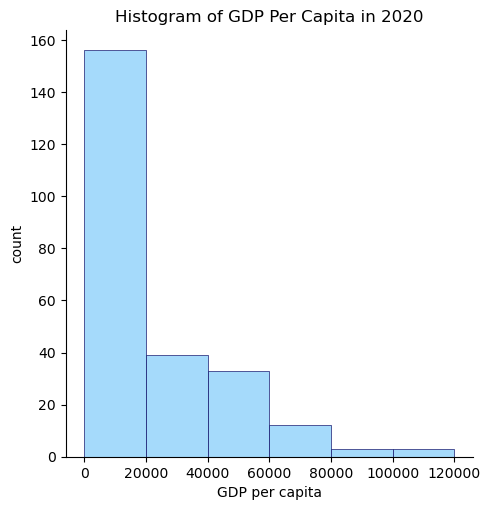

In [77]:
##histogram with seaborn

sns.color_palette('bright')
sns.displot(data=gdp_2020, 
            x='GDP_Per_Capita', 
            edgecolor='MidnightBlue',
            linewidth=0.5,
            color="LightSkyBlue",
            bins = np.arange(start = 0, stop = 140000, step = 20000))
plt.xlabel('GDP per capita')                            
plt.ylabel('count')
plt.title('Histogram of GDP Per Capita in 2020')

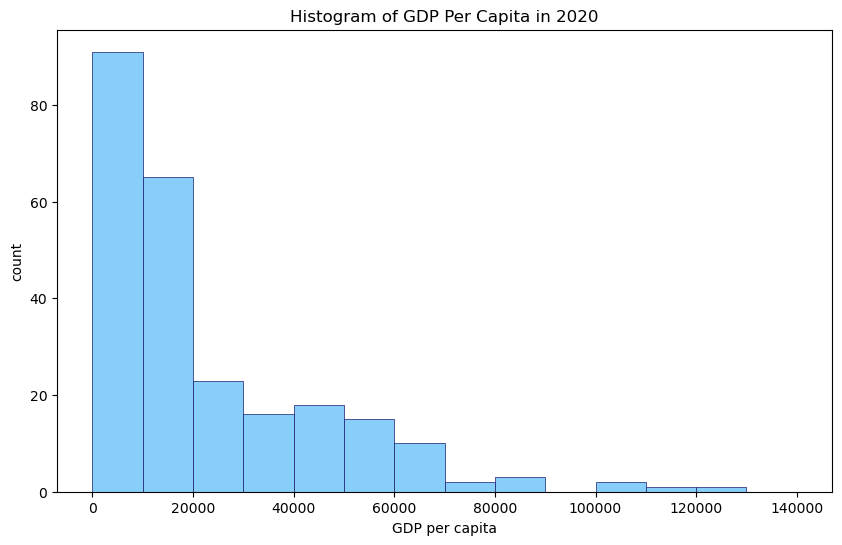

In [76]:
##histogram with matplotlib

fig,ax = plt.subplots(figsize = (10,6))     

plt.hist(
    data=gdp_2020,
    x='GDP_Per_Capita',
    edgecolor='MidnightBlue',
    linewidth=0.5,
    color='LightSkyBlue',
    bins = np.arange(start = 0, stop = 150000, step = 10000)
);                              
plt.xlabel('GDP per capita')                            
plt.ylabel('count')
plt.title('Histogram of GDP Per Capita in 2020')

Text(0.5, 1.0, 'Density Plot of GDP Per Capita in 2020')

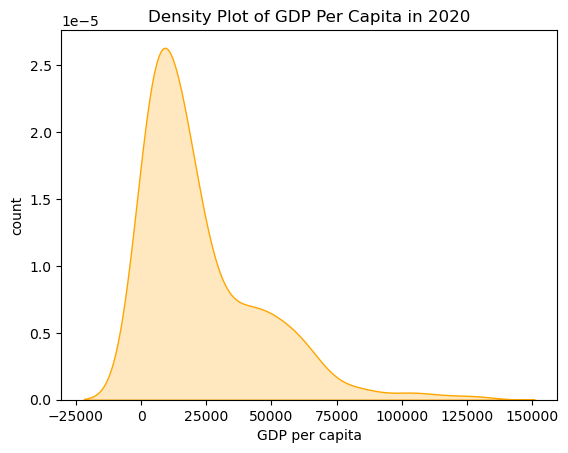

In [36]:
sns.kdeplot(data=gdp_2020['GDP_Per_Capita'], fill=True, color = 'orange')
plt.xlabel('GDP per capita')                            
plt.ylabel('count')
plt.title('Density Plot of GDP Per Capita in 2020')

Text(0.5, 1.0, 'Box Plot of GDP Per Capita in 2020')

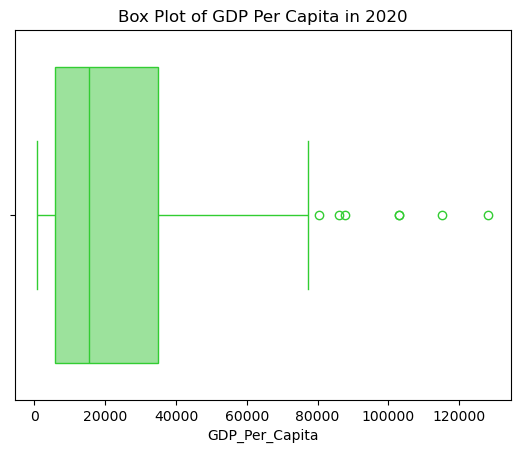

In [78]:
##boxplot with seaborn

sns.boxplot(x=gdp_2020["GDP_Per_Capita"], color="LightGreen", linecolor="LimeGreen")
plt.title('Box Plot of GDP Per Capita in 2020')

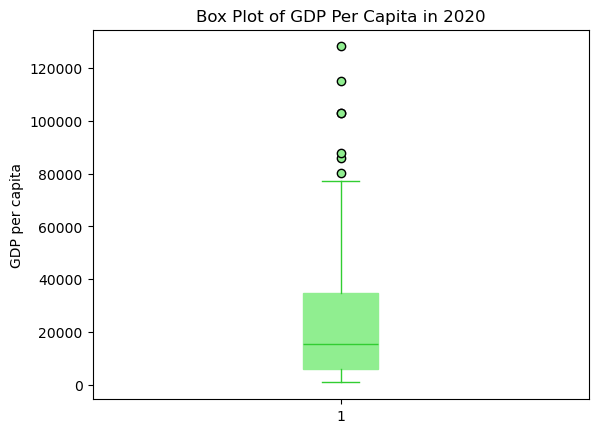

In [70]:
##boxplot with matplotlib

fig, ax = plt.subplots()
gdp_boxplot = plt.boxplot(gdp_2020['GDP_Per_Capita'], patch_artist=True)
plt.ylabel('GDP per capita')    
plt.title('Box Plot of GDP Per Capita in 2020')
plt.setp(gdp_boxplot['boxes'], color="LightGreen")
plt.setp(gdp_boxplot['whiskers'], color="LimeGreen")
plt.setp(gdp_boxplot['caps'], color="LimeGreen")
plt.setp(gdp_boxplot['fliers'], markerfacecolor="LightGreen")
plt.setp(gdp_boxplot['medians'], color="LimeGreen")
plt.show()

<Axes: xlabel='GDP_Per_Capita'>

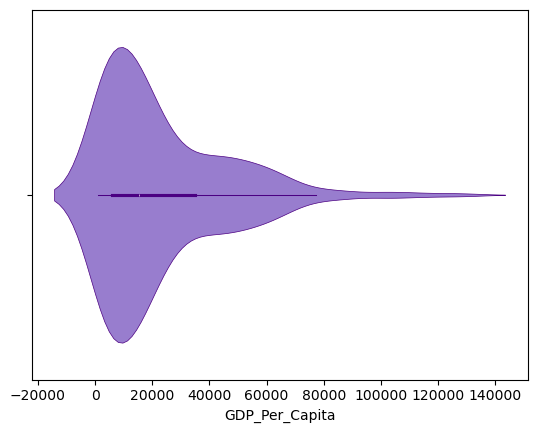

In [79]:
sns.violinplot(x=gdp_2020["GDP_Per_Capita"], color="MediumPurple", edgecolor='Indigo', linewidth=0.5)

9. What was the median GDP per capita value in 2020?

In [80]:
gdp_2020["GDP_Per_Capita"].median()

15309.23598817024

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

11. Which country was the first to have a GDP per capita greater than $100,000?